<a href="https://colab.research.google.com/github/Sahil-Sidana/Density-Peaks-Clustering/blob/main/SDPC_Part1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import math as math
import random
import matplotlib.pyplot as plt

In [ ]:
class Hybrid_Sampling:

    # it randomly generate pdash points and return index of these points in range [0-3999].
    def random_generate(self,X, pdash):

        indices = list(range(len(X)))
        return random.sample(indices, pdash)

    # it picks p representative points from pdash random points, p=0.1*N
    def kmeans_plusplus(self,pdashpoints,k,X):

        p_rep = random.sample(pdashpoints,1)
        dim = np.shape(X)[1];
        for i in range(1, k):
            index=-1
            distance=-1
            for p in pdashpoints:
              p_distance=np.inf;
              # if(p not in p_rep):
              for c in p_rep:
                  dist = 0;
                  # temp = pdashpoints[c]
                  for k in range(dim):
                    dist=dist+ (X[p][k]-X[c][k])**2

                  p_distance=min(p_distance,dist);
              if(p_distance>distance):
                  distance=p_distance
                  index=p;
            if(index!=-1):
                p_rep.append(index);

        return p_rep

In [ ]:
class SDPC:
    def __init__(self, dc, rho_delta_threshold):
        self.dc = dc
        self.rho_delta_threshold = rho_delta_threshold


    def calculate_pairwise_distances(self, X, p_rep):
        n = len(p_rep)
        m = len(X)
        dim = np.shape(X)[1]
        distances = np.zeros((n, m))
        for i in range(n):
            for j in range(m):
              if(p_rep[i]!=j):
                dist = 0
                for k in range(dim):
                  dist=dist+ (X[p_rep[i]][k]-X[j][k])**2

                distances[i][j] = math.sqrt(dist);
        return distances



    def calculate_local_density(self, X, p_rep, distances):
        n = len(p_rep)
        m = len(X)
        rho = np.zeros(n)
        for i in range(n):
          for j in range(m):
            if(p_rep[i]==j):
              continue;
            if(distances[i][j]<=self.dc):
              rho[i]=rho[i]+1;
        return rho



    def calculate_delta(self, X, p_rep, distances, rho):
        n = len(p_rep)
        delta = np.zeros(n)
        for i in range(n):
            min_distance = np.inf
            for j in range(n):
                if rho[j] > rho[i]:
                    min_distance = min(min_distance, distances[i][p_rep[j]])

            if(min_distance!=np.inf):
              delta[i] = min_distance
            else:
              maxi = 0
              for j in range(n):
                maxi = max(maxi,distances[i][p_rep[j]])
              delta[i] = maxi
        return delta



    def identify_cluster_centers(self, X, p_rep, distances, rho, delta):
        candidate_centers = []
        n = len(p_rep)
        for i in range(n):
          if((rho[i] * delta[i])> self.rho_delta_threshold):
              candidate_centers.append(p_rep[i])
              print(p_rep[i]);
        return candidate_centers



    def assign_clusters(self, X, cluster_centers):
      clusters = []
      for i in range(len(cluster_centers)):
        clusters.append([])
      dim = np.shape(X)[1]
      for i in range(len(X)):
          min_distance=np.inf
          min_center=None;
          for j in range(len(cluster_centers)):
            dist = 0
            for k in range(dim):
              dist=dist+ (X[i][k]-X[cluster_centers[j]][k])**2

            if(dist<min_distance):
              min_distance=dist
              min_center=j
          if min_center is not None:
              clusters[min_center].append(i)
      return clusters



    def plot_clusters(self, X, cluster_centers, clusters):
        plt.figure(figsize=(8, 8))
        for i, center_idx in enumerate(cluster_centers):
            center = X[center_idx]
            cluster_points = X[clusters[i]]
            plt.scatter(cluster_points[:, 0], cluster_points[:, 1], label=f'Cluster {i+1}')
            plt.scatter(center[0], center[1], color='black', marker='D', label=f'Cluster Center {i+1}')
        plt.title('SDPC Clustering')
        plt.xlabel('X1')
        plt.ylabel('X2')
        plt.legend()
        plt.show()


In [ ]:
import pandas as pd
pd.set_option('display.float_format', lambda x: '%.9f' % x)
X = pd.read_csv('fig2_panelB.dat', delimiter=' ', header=None)
X = X.values

print("Dataset size: ",len(X),"\n");

print("Dataset: \n",X,"\n");

Dataset size:  4000 

Dataset: 
 [[-0.35516673  0.70964891]
 [-0.35598043  0.70971084]
 [-0.35798499  0.70530629]
 ...
 [-0.76484072  1.17974949]
 [-0.71984321  1.14317536]
 [-0.7386151   1.06823897]] 



In [ ]:
k=int(0.1*len(X))
random_points=int(0.25*len(X))

print("No of representatives: ",k,"\n");

print("No of random points: ",random_points,"\n");

No of representatives:  400 

No of random points:  1000 



In [ ]:
hs=Hybrid_Sampling()

pdashpoints = hs.random_generate(X, random_points)

print("p` random points (indices) :", pdashpoints)


p` random points (indices) : [1670, 738, 816, 1737, 1629, 1146, 1839, 686, 1265, 3239, 3687, 553, 2300, 3386, 3499, 1092, 3597, 1123, 1524, 2865, 787, 1720, 60, 1131, 1498, 1527, 3059, 1913, 2949, 120, 1415, 259, 2822, 1918, 806, 1233, 1589, 2236, 3905, 3878, 1700, 3575, 2089, 3216, 833, 811, 2435, 1874, 391, 2062, 130, 2598, 1143, 3627, 2148, 1007, 431, 1023, 3034, 1897, 3227, 2000, 1820, 3806, 3701, 1059, 1147, 3537, 3394, 621, 3560, 40, 3127, 781, 3429, 3601, 1901, 638, 2351, 3835, 3824, 2164, 891, 3283, 134, 2815, 3874, 2251, 1806, 3928, 3480, 1676, 2943, 3976, 2426, 591, 2303, 2719, 3456, 3973, 3320, 2081, 3523, 3299, 3840, 452, 3706, 1022, 860, 1450, 3286, 22, 2806, 2836, 1985, 2839, 146, 842, 474, 1419, 516, 660, 750, 224, 1489, 2653, 2717, 2853, 154, 2118, 3783, 1069, 1187, 1373, 870, 3343, 933, 1691, 2951, 2684, 1368, 950, 459, 3485, 640, 2050, 1733, 3236, 238, 506, 2916, 2634, 790, 2803, 191, 3790, 3533, 881, 2888, 1251, 1811, 2152, 3288, 2350, 1679, 2920, 1594, 2500, 1825, 7

In [ ]:
# K means++ on pdashpoints

p_rep=hs.kmeans_plusplus(pdashpoints,k,X)

print("p representatives (indices) :",p_rep)

p representatives (indices) : [532, 3973, 3885, 3937, 3393, 3760, 3372, 3983, 3649, 1905, 3270, 2182, 3665, 3988, 3928, 3971, 2407, 1671, 3127, 3921, 3751, 3162, 3734, 3975, 3222, 3835, 3592, 3537, 3527, 1907, 3722, 3083, 3546, 1644, 294, 3723, 3773, 3701, 3600, 3552, 3681, 3716, 3613, 3130, 2616, 3485, 3200, 3991, 3428, 3551, 2028, 3451, 3271, 3912, 3968, 3627, 1473, 3718, 3158, 3484, 2711, 1442, 3014, 3799, 3516, 3826, 3896, 3720, 3821, 3500, 3931, 3999, 3930, 3059, 3857, 2904, 3387, 3798, 1913, 3903, 3405, 3407, 3904, 1333, 1724, 3647, 876, 3775, 3953, 3000, 3784, 1975, 3036, 3965, 3392, 2968, 2689, 3207, 2845, 2101, 3680, 3134, 2106, 3853, 3939, 2564, 3672, 3075, 3450, 2717, 2660, 3717, 1637, 3840, 3748, 227, 3423, 3501, 3418, 3704, 2089, 3561, 3889, 3003, 2416, 3781, 2202, 2842, 3514, 2976, 3962, 3504, 3905, 978, 3346, 3011, 3446, 3829, 3548, 2173, 1780, 3874, 3559, 3616, 3141, 2836, 2544, 3431, 3100, 2767, 1230, 3445, 3498, 3957, 2634, 3605, 3736, 1159, 2548, 3521, 2837, 2759, 15

In [ ]:
# dc = 0.103
# rho_delta_threshold = 110

dc = 0.0245
rho_delta_threshold = 11


print("Cut off Distance threshold: ",dc,"\n");

print("rho * delta threshold: ",rho_delta_threshold,"\n");

Cut off Distance threshold:  0.0245 

rho * delta threshold:  11 



In [ ]:
sdpc = SDPC(dc, rho_delta_threshold)
distances = sdpc.calculate_pairwise_distances(X, p_rep)

print("Euclidean distance between each pair of data point\n");
print("Distance Matrix:\n", distances,"\n")

Euclidean distance between each pair of data point

Distance Matrix:
 [[0.08568371 0.08626369 0.08437999 ... 0.70924273 0.65218895 0.61025174]
 [0.70393219 0.70336301 0.70547348 ... 0.08150893 0.13743487 0.19380691]
 [0.57054477 0.57074036 0.57555143 ... 0.59207436 0.55343455 0.59067674]
 ...
 [0.23969051 0.24012817 0.24485679 ... 0.61885194 0.56236021 0.55237101]
 [0.01537107 0.01581264 0.0205432  ... 0.62026047 0.56296649 0.52328005]
 [0.39743472 0.39681051 0.39849306 ... 0.22950163 0.17513358 0.12800167]] 



In [ ]:
rho = sdpc.calculate_local_density(X, p_rep, distances)
rho_df = pd.DataFrame(rho)
pd.set_option('display.float_format', lambda x: '{:.0f}'.format(x))
print("Rho of each point:\n", rho_df, "\n")

Rho of each point:
       0
0   123
1     2
2     1
3     0
4     5
..   ..
395  14
396   2
397  69
398 127
399  41

[400 rows x 1 columns] 



In [ ]:
delta = sdpc.calculate_delta(X, p_rep, distances, rho)

print("Delta of each point:\n",delta,"\n");

Delta of each point:
 [0.02024733 0.24896439 0.04836408 0.03063619 0.05124609 0.02821849
 0.04135623 0.06182927 0.05172757 0.0625575  0.02287786 0.02536878
 0.1071056  0.06857766 0.05558898 0.06051918 0.02170137 0.03167436
 0.02534121 0.04348019 0.06619679 0.02266709 0.03649476 0.06516781
 0.02250474 0.05495161 0.03119011 0.04238919 0.02712209 0.0193009
 0.0607282  0.0360825  0.03846068 0.02157239 0.03214581 0.0570135
 0.13930667 0.02684314 0.05721096 0.02853434 0.01985791 0.02452157
 0.07870453 0.03757587 0.02555111 0.05365755 0.02358215 0.09923838
 0.04238919 0.03571728 0.02753113 0.0494019  0.05021266 0.057558
 0.05958544 0.0476061  0.02770528 0.07147406 0.0251087  0.04799427
 0.02396975 0.02617259 0.02812904 0.06170893 0.03690357 0.05231059
 0.05273693 0.06362135 0.06234414 0.03579468 0.07975014 0.07654924
 0.0792065  0.03172779 0.04949469 0.01960597 0.04354457 0.03372812
 0.02995987 0.08142154 0.0248574  0.03570895 0.12255439 0.0211125
 0.05751176 0.08820106 0.0191633  0.0350329  

In [ ]:
cluster_centers = sdpc.identify_cluster_centers(X, p_rep, distances, rho, delta)

print("Cluster centers:\n", cluster_centers,"\n")

1780
1159
20
1485
1736
Cluster centers:
 [1780, 1159, 20, 1485, 1736] 



In [ ]:
clusters = sdpc.assign_clusters(X, cluster_centers)

print("Clusters: \n");

for i in range(len(clusters)):
    print(cluster_centers[i],": ", clusters[i],"\n");
# for idx, cluster in enumerate(clusters):
#     print(f"Cluster {idx + 1}: {cluster}")

Clusters: 

1780 :  [1780, 1802, 1805, 1820, 1828, 1836, 1840, 1856, 1863, 1867, 1868, 1873, 1878, 1882, 1886, 1892, 1893, 1916, 1920, 1923, 1930, 1934, 1946, 1947, 1960, 1964, 1973, 1984, 1991, 2004, 2007, 2010, 2013, 2015, 2019, 2021, 2039, 2052, 2067, 2073, 2082, 2088, 2112, 2117, 2119, 2148, 2153, 2159, 2165, 2166, 2169, 2171, 2181, 2183, 2185, 2186, 2192, 2196, 2197, 2206, 2221, 2229, 2232, 2241, 2263, 2268, 2279, 2297, 2302, 2304, 2308, 2322, 2323, 2342, 2357, 2363, 2365, 2373, 2379, 2381, 2391, 2402, 2405, 2407, 2428, 2446, 2447, 2469, 2472, 2473, 2509, 2534, 2538, 2539, 2546, 2559, 2561, 2583, 2602, 2609, 2624, 2647, 2649, 2675, 2678, 2687, 2693, 2697, 2700, 2701, 2702, 2720, 2723, 2755, 2772, 2795, 2811, 2815, 2820, 2825, 2848, 2851, 2855, 2870, 2883, 2886, 2890, 2891, 2892, 2922, 2943, 2986, 3000, 3011, 3025, 3035, 3055, 3075, 3088, 3133, 3154, 3157, 3167, 3200, 3208, 3211, 3254, 3286, 3292, 3305, 3329, 3339, 3349, 3353, 3381, 3383, 3397, 3401, 3415, 3419, 3431, 3432, 3443, 3

Graph of Clusters:



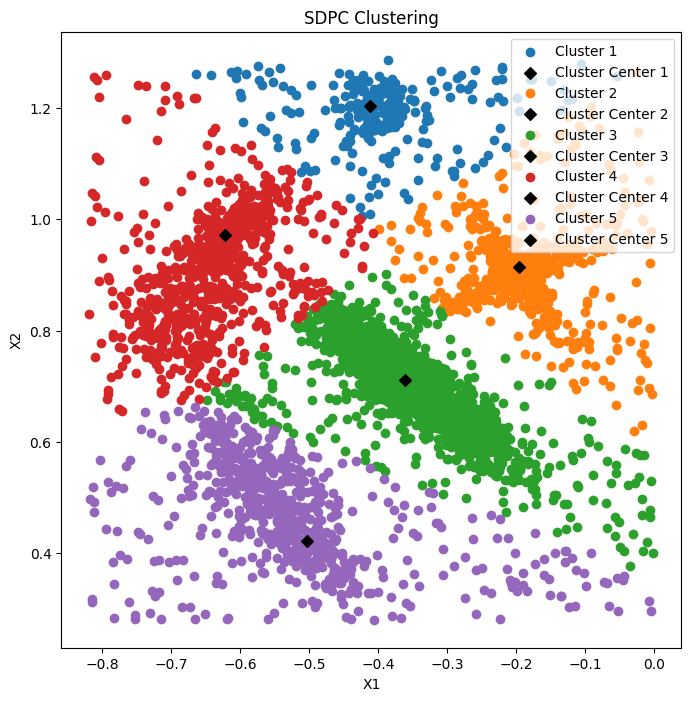

In [ ]:
print("Graph of Clusters:\n");

sdpc.plot_clusters(X, cluster_centers, clusters)